<a href="https://colab.research.google.com/github/MuneefMumthas/CO538-Muneef-22206529/blob/main/CO538_CW1_MLProject_Muneef_22206529.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**




This is an .ipynb file for Machine Learning project for **CO538**.

**Student Name:** Muneef Ahamed Mohamed Mumthas

**Student ID:** 22206529

**Course:** BSc (Hons) Artificial Intelligence with Foundation Year

**Module:** CO538 - Machines And Their Languages

# **Research Question**

##**Using Raw Housing Data, Can We Accurately Predict House Prices Based on Structural Attributes Alone, Without the Influence of Location?**

Predicting house prices is crucial in real estate, helping stakeholders make informed decisions. However, this task can be challenging, particularly when dealing with unfamiliar data formats and potential data quality issues. This research aims to determine if it's possible to predict house prices based solely on structural features, regardless of location, overcoming data complexities. The raw dataset used includes unprocessed information with potential missing values, outliers, and inconsistencies, representing real-world data that requires thorough preprocessing.

#**Dataset Summary**



The real estate markets present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial as property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues.

## Columns Explanation

- **Date**: The date when the property information was recorded.
- **Price**: The price of the property.
- **Bedrooms**: The number of bedrooms in the property.
- **Bathrooms**: The number of bathrooms in the property.
- **Sqft_living**: The square footage of living space in the property.
- **Sqft_lot**: The square footage of the lot where the property is located.
- **Floors**: The number of floors in the property.
- **Waterfront**: Whether the property has a waterfront view (binary: 0 for no, 1 for yes).
- **View**: An index from 0 to 4 representing the level of view the property has.
- **Condition**: An index from 1 to 5 representing the overall condition of the property.
- **Sqft_above**: The square footage of the interior space above ground level.
- **Sqft_basement**: The square footage of the basement space.
- **Yr_built**: The year the property was built.
- **Yr_renovated**: The year the property was last renovated.
- **Street**: The street address of the property.
- **City**: The city where the property is located.
- **Statezip**: The state and ZIP code of the property.
- **Country**: The country where the property is located.

**This column description is based on my analysis of the dataset CSV file.**


#**Importing The Libraries**

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score

#**Importing The Dataset**


In [352]:
path = "/content/drive/MyDrive/HousingData.csv"

df = pd.read_csv(path)



In [353]:
df.head()
# sampling the dataset by showing the first five rows

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00,3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.00,5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00,3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00,3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00,4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


#**Exploratory Data Analysis (EDA)**


## **Data Preprocessing**

In [354]:
# changing the float format to make it easier to understand
pd.set_option('display.float_format', lambda x: format(x, '.2f'))
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


In [355]:
# checking the number of rows and columns
df.shape

(4600, 18)

In [356]:
# checking whether the columns have appropriate data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

We can see that the datatypes for bedrooms, bathrooms and floors are not the expected types (they can't be float).

In [357]:
# changing the dtype of floors, bedrooms and bathrooms to 'int'
df[['bedrooms','bathrooms', 'floors']] = df[['bedrooms','bathrooms', 'floors']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   int64  
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   int64  
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [358]:
# checking the number of rows where the price is 0
(df['price']==0).sum(0)

49

There are **49** rows where the price is **0**. Since the price of a house cannot be 0, we can consider them as missing values and either replace them with the average price or remove them entirely from our dataset. **I chose to remove them**, as replacing them with the mean price might weaken the predictive power.

In [359]:
# Deleting rows where price is 0
df = df[df['price'] != 0]
len(df)
# 4600 - 49 = 4551

4551

In [360]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.00,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [361]:
# dropping the features/columns that do not affect the predictive power.
df.drop(['street', 'date', 'country'], axis=1, inplace=True)


<ipython-input-361-dc8a70e8ca24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['street', 'date', 'country'], axis=1, inplace=True)


In [362]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.00,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.00,5,2,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.00,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.00,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.00,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond,WA 98052


In [363]:
df.shape

(4551, 15)

**Checking for outliers:**

In [364]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00
mean,557905.90,3.39,1.78,2132.37,14835.28,1.46,0.01,0.23,3.45,1822.22,310.15,1970.80,808.56
std,563929.87,0.90,0.74,955.95,35964.08,0.55,0.08,0.77,0.68,854.45,461.99,29.76,979.42
min,7800.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,326264.29,3.00,1.00,1460.00,5000.00,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,465000.00,3.00,2.00,1970.00,7680.00,1.00,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,657500.00,4.00,2.00,2610.00,10978.00,2.00,0.00,0.00,4.00,2300.00,600.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.00,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


<ipython-input-365-cd1c55d9323b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

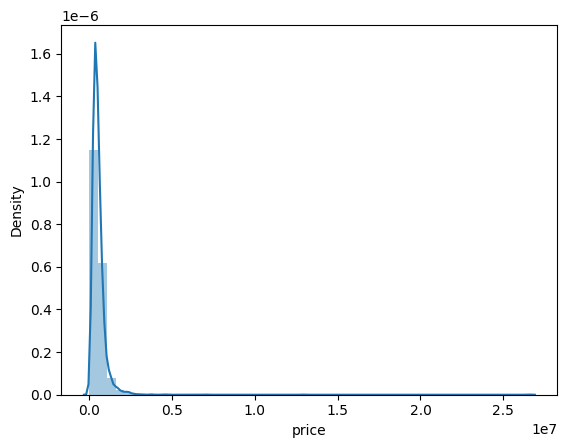

In [365]:
#checking for outlier using distplot
sns.distplot(df['price'])

<Axes: ylabel='price'>

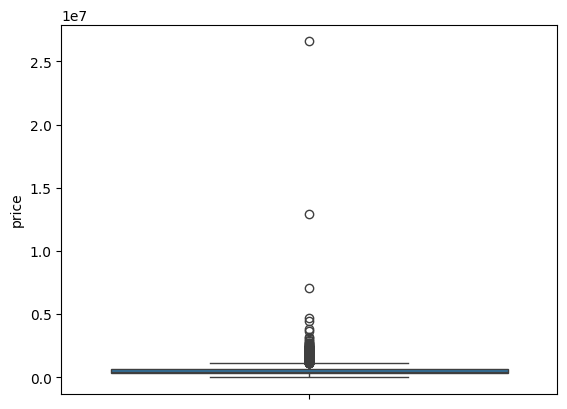

In [366]:
# using boxplot to see the outliers more clearly
sns.boxplot(df['price'])

**Handling the outliers using the IQR (Interquartile Range) Method.**

In [367]:
# First Quartile
q1 = df['price'].quantile(0.25)

# Third Quartile
q3 = df['price'].quantile(0.75)

# Inter Quartile Range
iqr = q3-q1

q1, q3, iqr

(326264.2857145, 657500.0, 331235.7142855)

In [368]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)

# values outside this range will be considered as outliers
lower_limit, upper_limit

(-170589.28571375, 1154353.57142825)

<Axes: ylabel='price'>

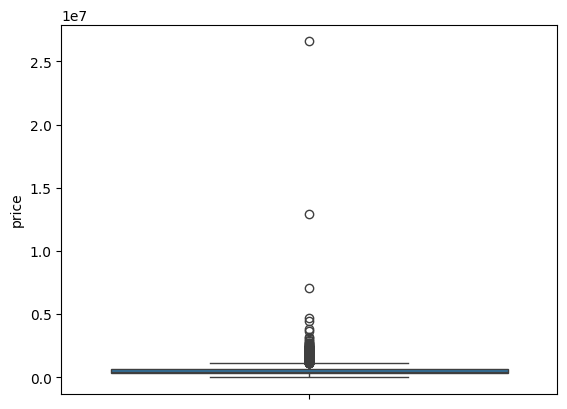

In [369]:
# Before Handling Outliers
sns.boxplot(df['price'])

In [370]:
# Capping - Changing the outlier values to upper (or) Lower Limit values

df.loc[(df['price']>upper_limit), 'price'] = upper_limit

df.loc[(df['price']<lower_limit), 'price'] = lower_limit



Using the upper and lower limits, I capped the outliers instead of removing them completely. As removing outliers entirely from the dataset might lead to a loss of valuable information.

<Axes: ylabel='price'>

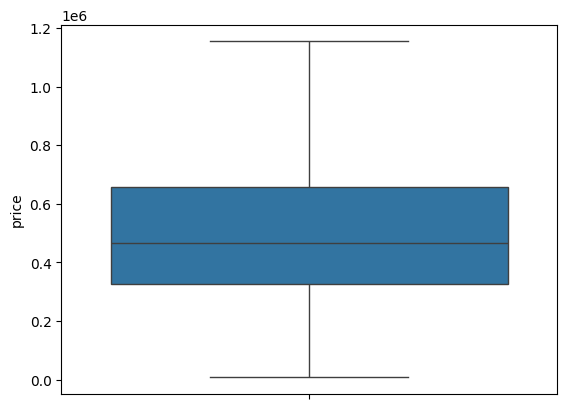

In [371]:
# After Handling Outliers
sns.boxplot(df['price'])

<ipython-input-372-86c1ddc3c66a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

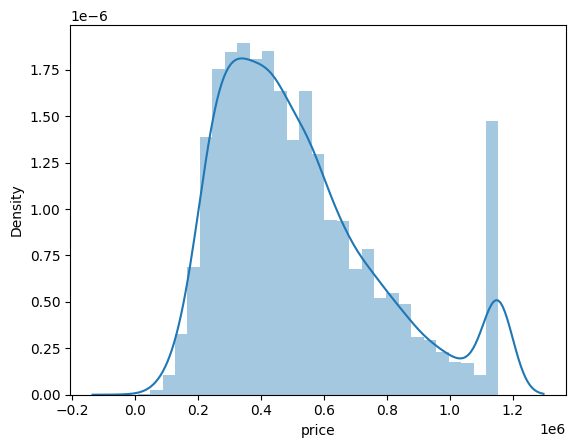

In [372]:
sns.distplot(df['price'])


In [373]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.00,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,1154353.57,5,2,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.00,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.00,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.00,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond,WA 98052


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4551 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4551 non-null   float64
 1   bedrooms       4551 non-null   int64  
 2   bathrooms      4551 non-null   int64  
 3   sqft_living    4551 non-null   int64  
 4   sqft_lot       4551 non-null   int64  
 5   floors         4551 non-null   int64  
 6   waterfront     4551 non-null   int64  
 7   view           4551 non-null   int64  
 8   condition      4551 non-null   int64  
 9   sqft_above     4551 non-null   int64  
 10  sqft_basement  4551 non-null   int64  
 11  yr_built       4551 non-null   int64  
 12  yr_renovated   4551 non-null   int64  
 13  city           4551 non-null   object 
 14  statezip       4551 non-null   object 
dtypes: float64(1), int64(12), object(2)
memory usage: 697.9+ KB


In [375]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00,4551.00
mean,522626.14,3.39,1.78,2132.37,14835.28,1.46,0.01,0.23,3.45,1822.22,310.15,1970.80,808.56
std,257445.35,0.90,0.74,955.95,35964.08,0.55,0.08,0.77,0.68,854.45,461.99,29.76,979.42
min,7800.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,326264.29,3.00,1.00,1460.00,5000.00,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,465000.00,3.00,2.00,1970.00,7680.00,1.00,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,657500.00,4.00,2.00,2610.00,10978.00,2.00,0.00,0.00,4.00,2300.00,600.00,1997.00,1999.00
max,1154353.57,9.00,8.00,13540.00,1074218.00,3.00,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


## **Checking out the distributions of categorical data/variables against price to get insights:**

###Bedrooms vs Price


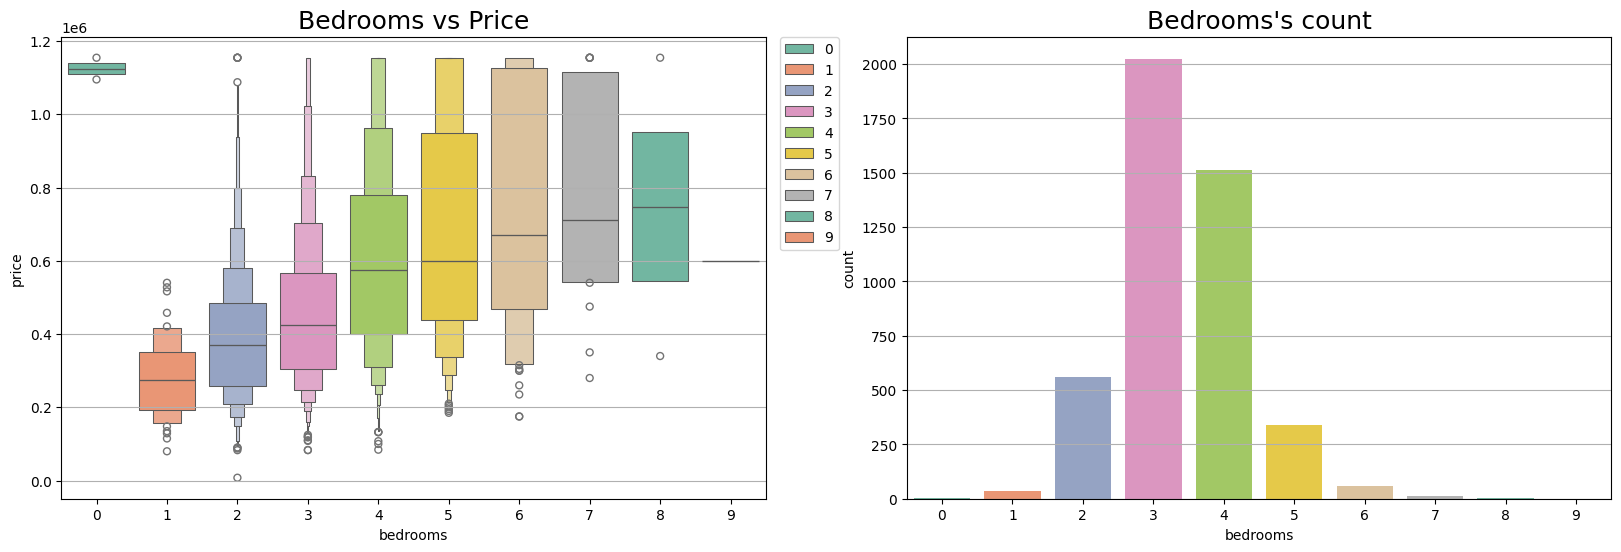

In [376]:
plt.figure(figsize=(20, 6))

# Boxen plot for bedrooms vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='bedrooms', y='price', hue='bedrooms', palette='Set2')
ax.set_title('Bedrooms vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# Countplot for bedrooms
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['bedrooms'], hue=df['bedrooms'], palette='Set2', legend=False)
ax.set_title('Bedrooms\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- All the houses in the dataset have 0 to 9 bedrooms.
- The majority of the houses in the dataset have 3 bedrooms.
- The number of bedrooms directly affects the price of a house.
- The price is highest when the number of bedrooms is 0.

###Bathrooms vs Price


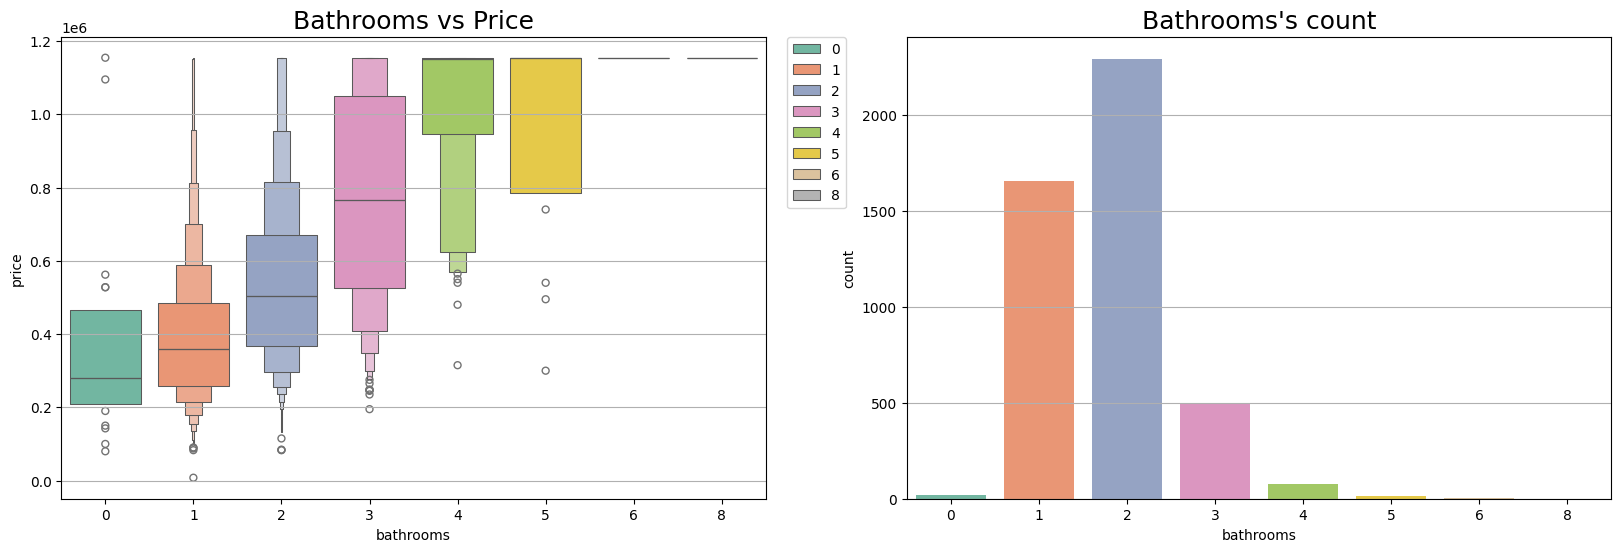

In [377]:
plt.figure(figsize=(20, 6))

# Boxen plot for bathrooms vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='bathrooms', y='price', hue='bathrooms', palette='Set2')
ax.set_title('Bathrooms vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for bathrooms
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['bathrooms'], hue=df['bathrooms'], palette='Set2', legend=False)
ax.set_title('Bathrooms\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- All the houses in the dataset have 0 to 8 bathrooms.
- The majority of the houses in the dataset have 2 bathrooms.
- The number of bathrooms directly affects the price of a house.

###Floors vs Price


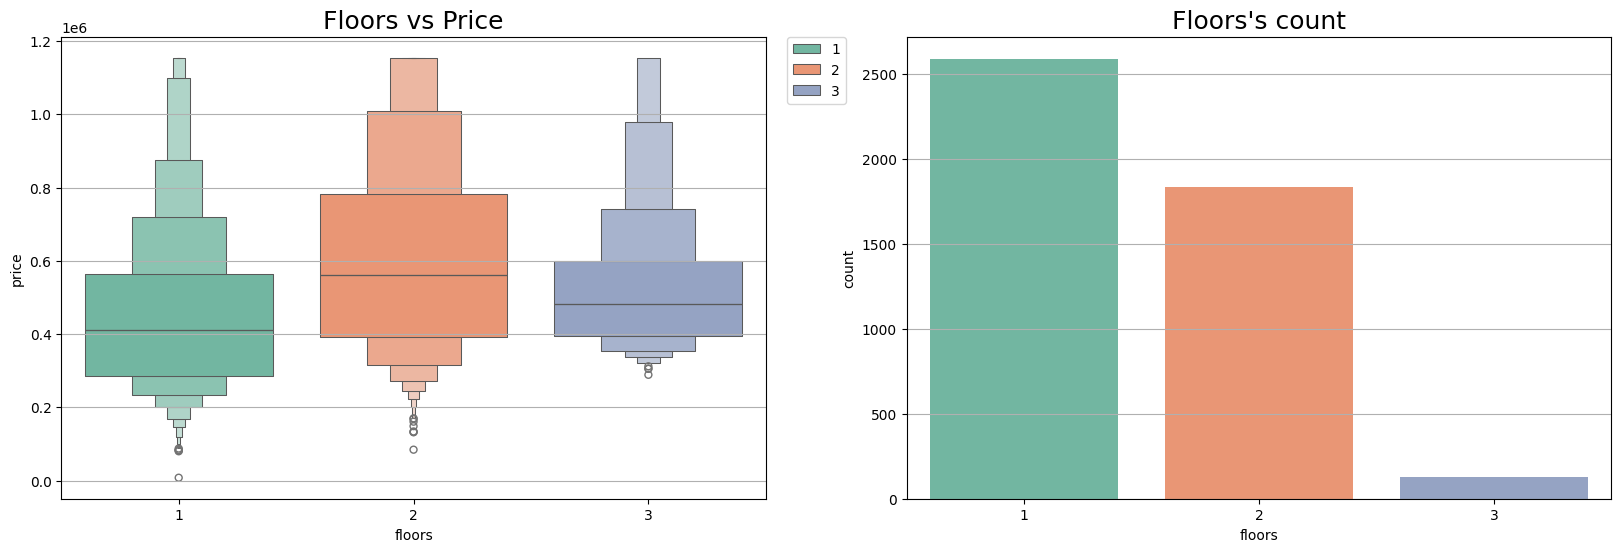

In [378]:
plt.figure(figsize=(20, 6))

# Boxen plot for floors vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='floors', y='price', hue='floors', palette='Set2')
ax.set_title('Floors vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for floors
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['floors'], hue=df['floors'], palette='Set2', legend=False)
ax.set_title('Floors\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- All the houses in the dataset have 1 to 3 floors.
- The majority of the houses in the dataset have 1 floor.
- The prices of the majority of houses with 2 floors are higher than those with 1 or 3 floors.

###Waterfront vs Price


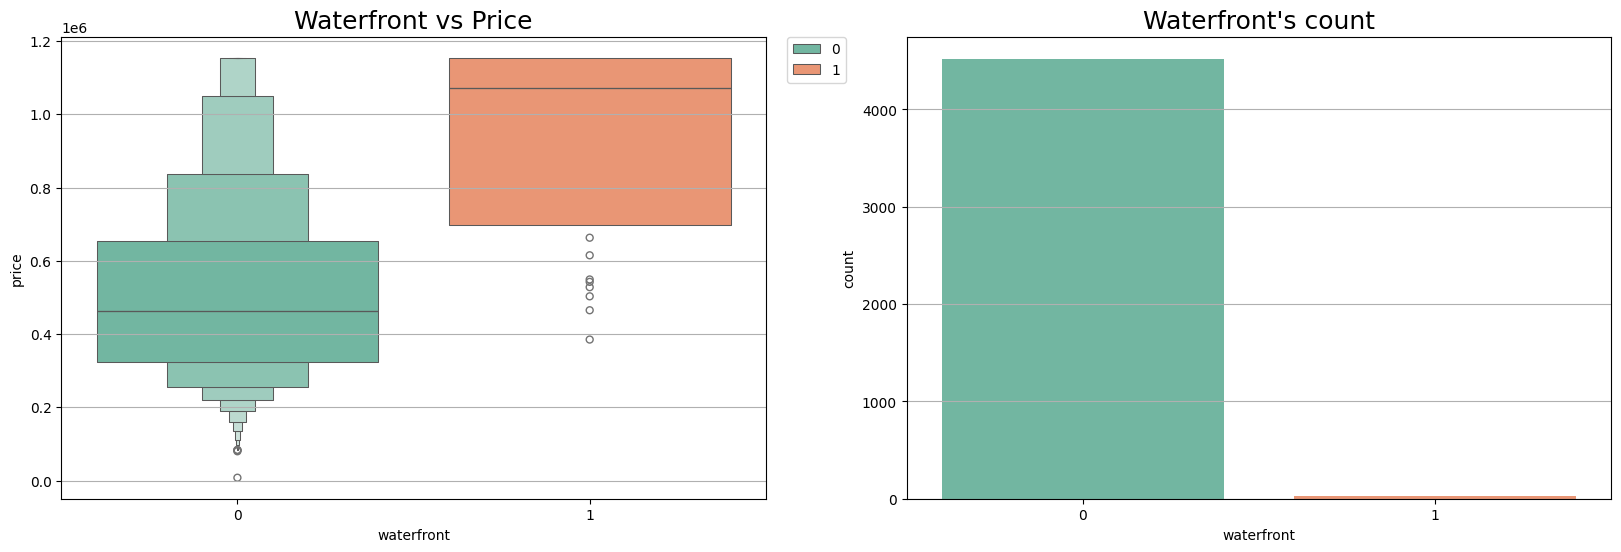

In [379]:
plt.figure(figsize=(20, 6))

# Boxen plot for waterfront vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='waterfront', y='price', hue='waterfront', palette='Set2')
ax.set_title('Waterfront vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for waterfront
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['waterfront'], hue=df['waterfront'], palette='Set2', legend=False)
ax.set_title('Waterfront\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- Most of the houses don't have a waterfront.
- The prices of houses with waterfront are higher than the ones without a waterfront.

###View vs Price


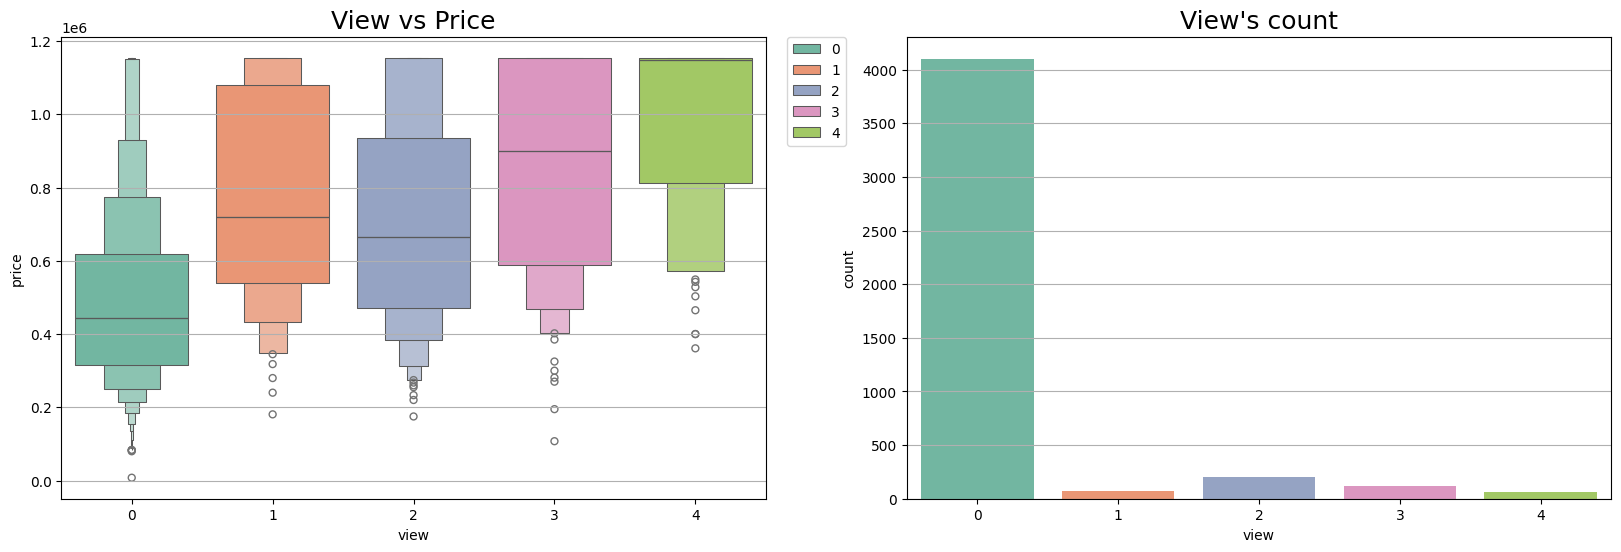

In [380]:
plt.figure(figsize=(20, 6))

# Boxen plot for view vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='view', y='price', hue='view', palette='Set2')
ax.set_title('View vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for view
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['view'], hue=df['view'], palette='Set2', legend=False)
ax.set_title('View\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- Most of the houses don't have a view.
- The prices of houses with 1 or more views are higher than the ones without a view.

###Condition vs Price


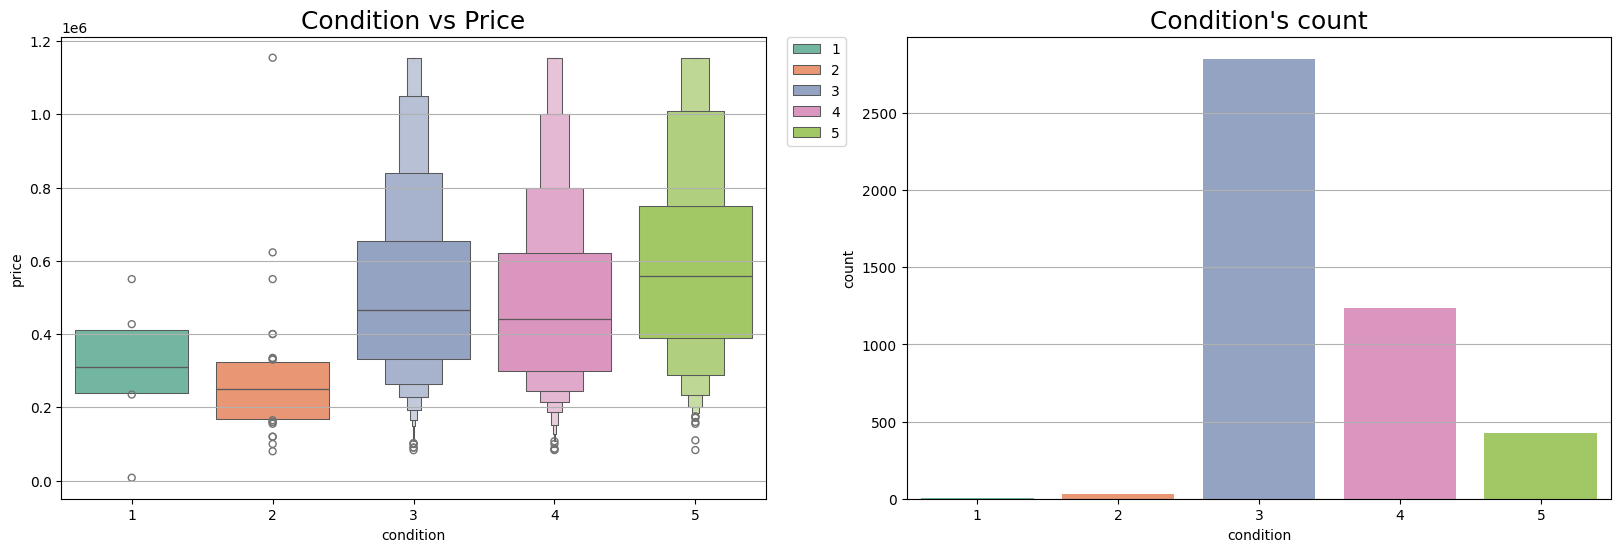

In [381]:
plt.figure(figsize=(20, 6))

# Boxen plot for condition vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='condition', y='price', hue='condition', palette='Set2')
ax.set_title('Condition vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for condition
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['condition'], hue=df['condition'], palette='Set2', legend=False)
ax.set_title('Condition\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- Most of the houses have condition rating 3
- The highest average price belongs to houses with condition rating 5.
- The lowest average price belongs to houses with condition rating 2.

## **Pairplot for numerical data/variables:**

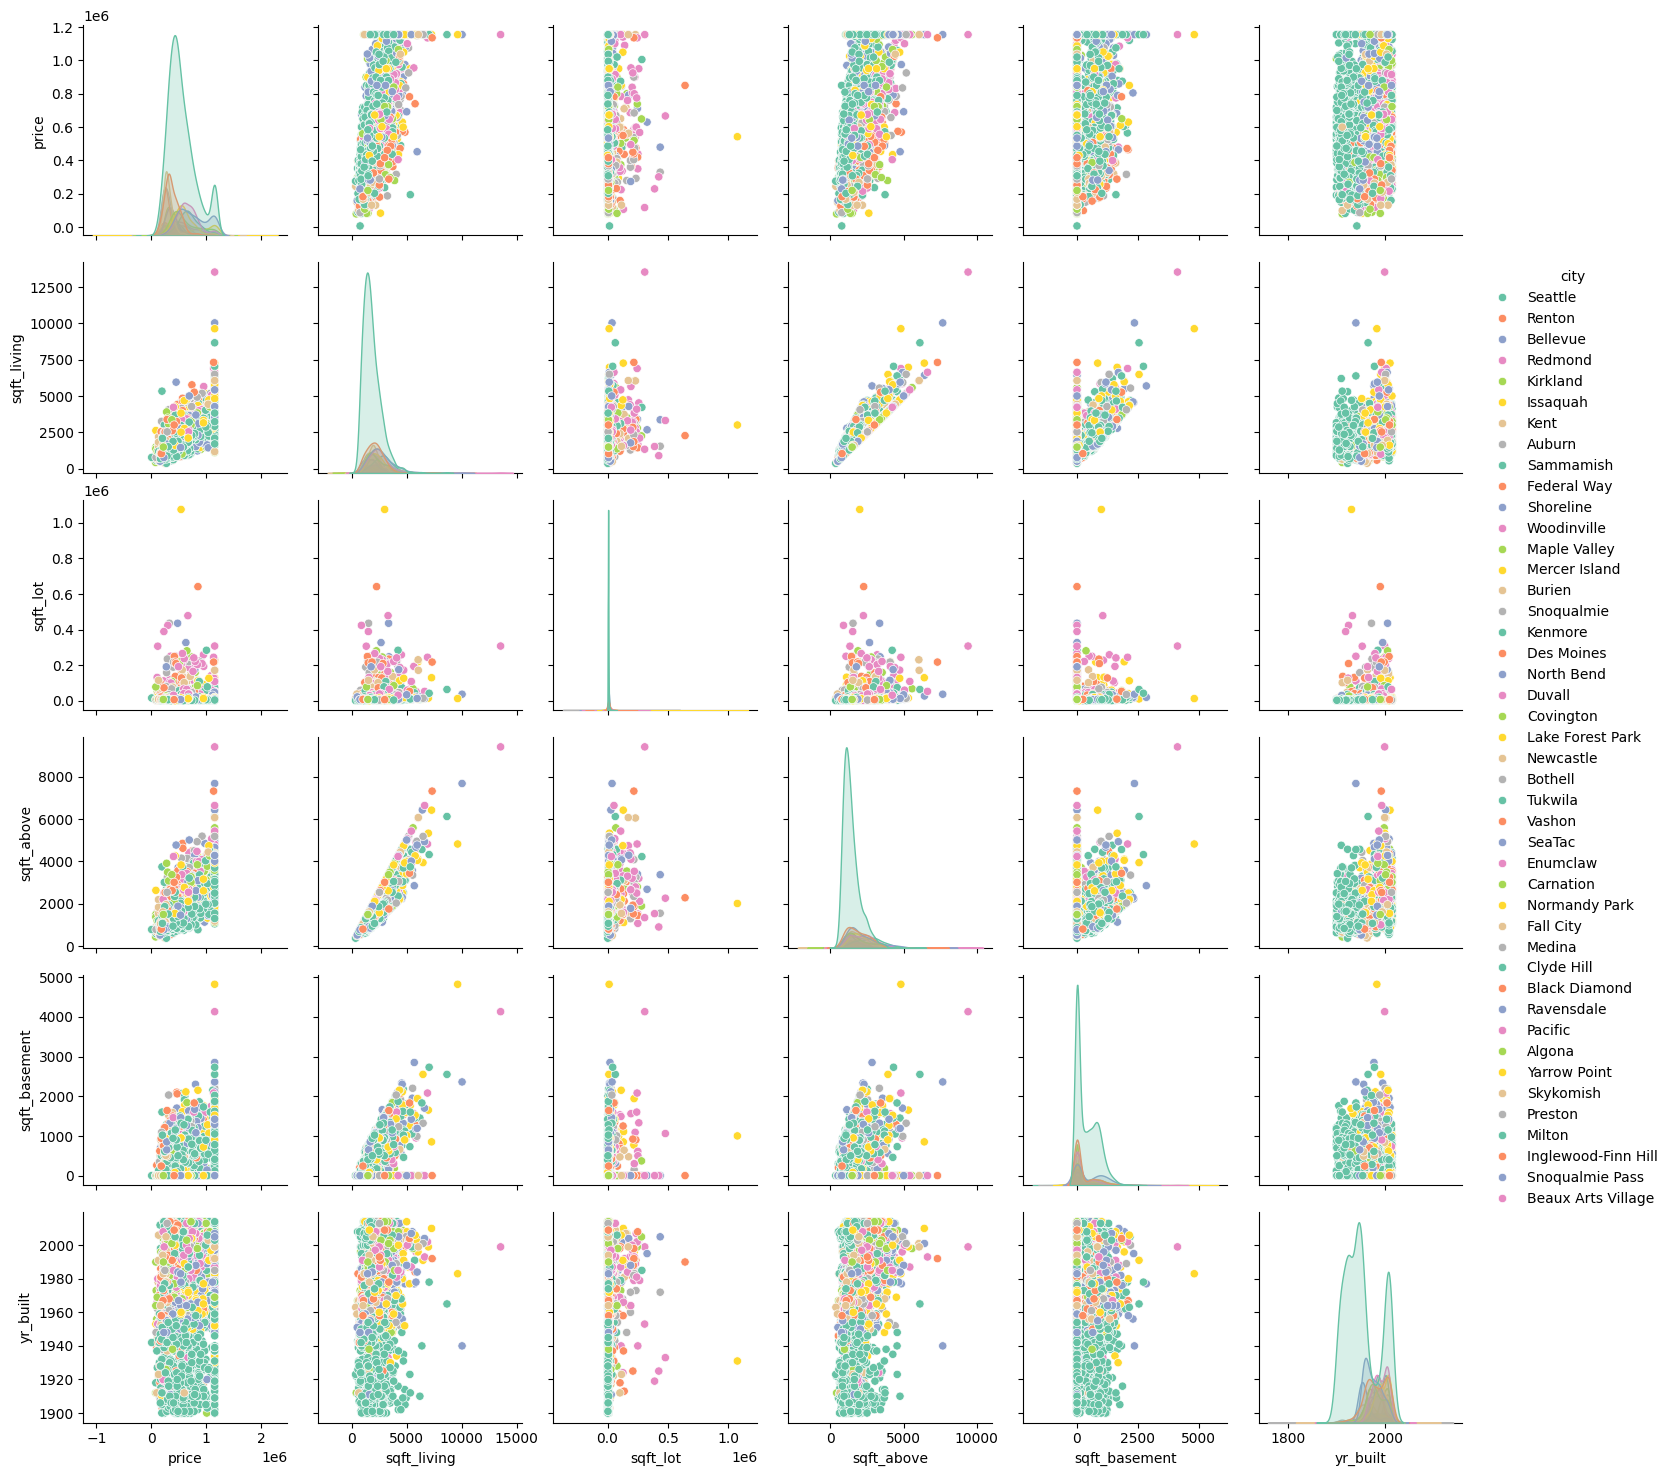

In [382]:
# Numerical variables for pairplot
df_Numerical_Variables = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'city']]

# Calculate city value counts and sort in descending order
city_counts = df['city'].value_counts().sort_values(ascending=False)

# Get ordered city names
ordered_city_names = city_counts.index

# Creating the pairplot with hue as city
sns.pairplot(df_Numerical_Variables, hue='city', hue_order=ordered_city_names, palette='Set2')
plt.show()

In [383]:
len(df['city'].value_counts())-1 #decreasing 1 for column heading

43

In [384]:
df['city'].value_counts()

city
Seattle                1561
Renton                  291
Bellevue                281
Redmond                 235
Kirkland                187
Issaquah                186
Kent                    184
Auburn                  175
Sammamish               171
Federal Way             145
Shoreline               123
Woodinville             114
Maple Valley             95
Mercer Island            82
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
North Bend               50
Duvall                   42
Covington                42
Lake Forest Park         34
Bothell                  33
Newcastle                33
Tukwila                  29
Vashon                   29
SeaTac                   28
Enumclaw                 27
Carnation                22
Normandy Park            17
Fall City                11
Medina                   11
Clyde Hill                9
Black Diamond             8
Ravensdale                7
Pacific        

**Insights:**
- The dataset contains housing data from 43 different cities.
- Most of the house data is from Seattle.
- Most of the houses in Seattle have the highest price.

##**Corr Heatmap**

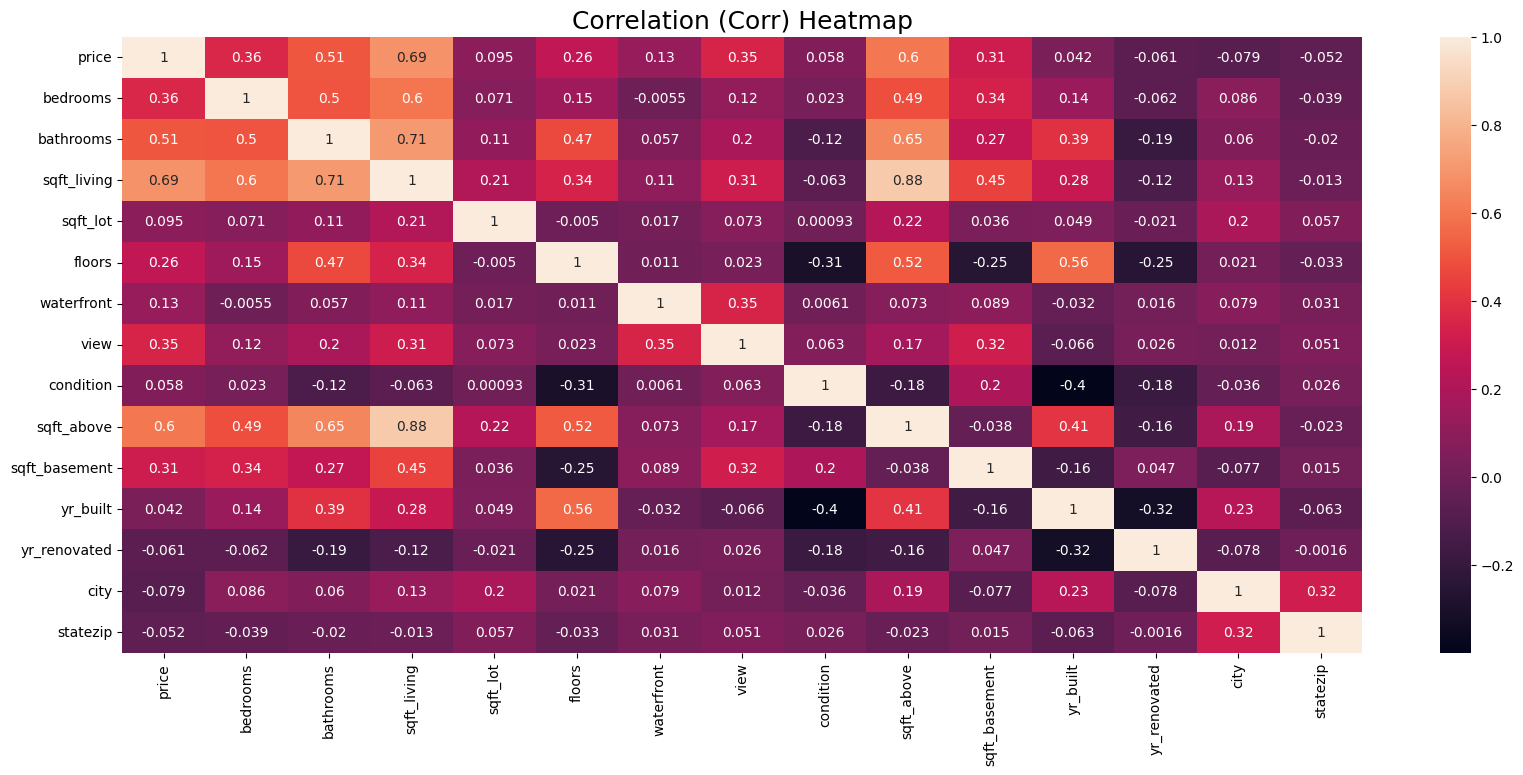

In [385]:
# Converting city and statezip to numerric vlaues starting from 0
# so that they can be included in the correlation heatmap as strings can not be converted into float
df['city'], _ = pd.factorize(df['city'])
df['statezip'], _ = pd.factorize(df['statezip'])

plt.figure(figsize=(20, 8))
ax = sns.heatmap(df.corr(), annot=True)
ax.set_title('Correlation (Corr) Heatmap', fontdict={'fontsize': 18})
plt.show()

##**Feature Selection Using Mutual Information**

Mutual Information (MI) shows us how each feature affects the target variable, like 'price' in this case. It helps us see how a feature's changes relate to changes in the target. The higher the MI score, the stronger the connection.

In [386]:
X = df.drop('price', axis=1)
Y = df['price']

In [387]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X, Y, random_state=10)
mi_score = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_score


sqft_living     0.27
sqft_above      0.20
bathrooms       0.16
statezip        0.07
bedrooms        0.07
floors          0.06
view            0.05
sqft_basement   0.05
city            0.03
sqft_lot        0.01
yr_built        0.01
condition       0.01
waterfront      0.00
yr_renovated    0.00
dtype: float64

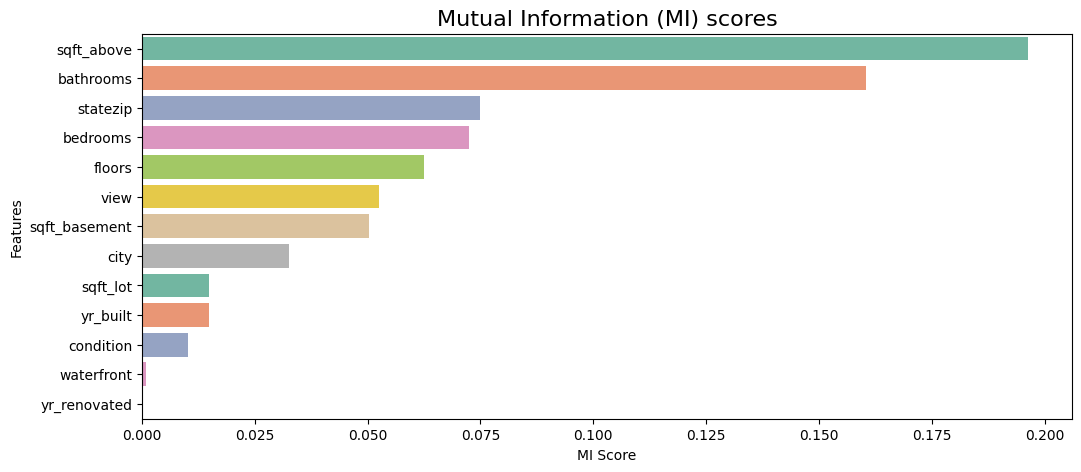

In [388]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(y=mi_score.index[1:], x=mi_score[1:], hue=mi_score.index[1:], palette='Set2')
ax.set_title('Mutual Information (MI) scores', fontdict={'fontsize': 16})
ax.set_xlabel('MI Score')
ax.set_ylabel('Features')
plt.show()

Removing the least effective variable, in our case its **yr_renovated**.

In [389]:
df.drop(['yr_renovated'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,statezip
0,313000.00,3,1,1340,7912,1,0,0,3,1340,0,1955,0,0
1,1154353.57,5,2,3650,9050,2,0,4,5,3370,280,1921,1,1
2,342000.00,3,2,1930,11947,1,0,0,4,1930,0,1966,2,2
3,420000.00,3,2,2000,8030,1,0,0,4,1000,1000,1963,3,3
4,550000.00,4,2,1940,10500,1,0,0,4,1140,800,1976,4,4


#**The Machine Learning Models**

**Note:**

After testing many times, I found the right test size and random state and kept it constant for all the models for a fair test.
For decision tree and random forest, I kept their randomness the same, to keep it fair.

##**Linear Regression**

### **Linear Regression** Model for prediction **including** location attributes.

In [390]:
Data_X = df.drop(columns=['price'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)

In [391]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3640, 13), (911, 13), (3640,), (911,))

In [392]:
#Fitting the dataset into the model
from sklearn.linear_model import LinearRegression

#Importing the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [393]:
predictions = lm.predict(X_test)
MSE_Linear_With_Location = metrics.mean_squared_error(y_test, predictions)
R2_Linear_With_Location = r2_score(y_test, predictions)
print('Linear Regression Model with location Atributes')
print(f'MSE: {MSE_Linear_With_Location:.4f}')
print(f'R2 Score: {R2_Linear_With_Location:.12f}')

Linear Regression Model with location Atributes
MSE: 26794314321.4702
R2 Score: 0.598049456296


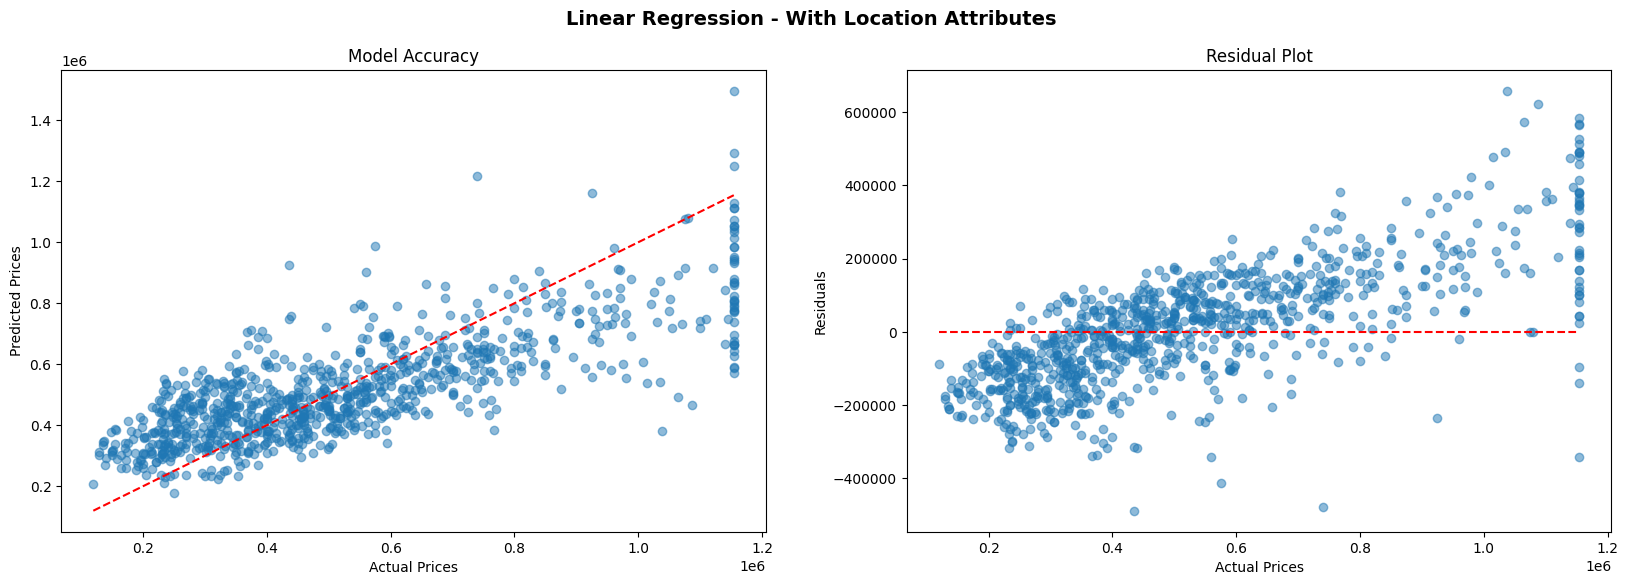

In [394]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Linear Regression - With Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **Linear Regression** Model for prediction **without including** location attributes.

In [395]:
Data_X_Without_Location = df.drop(columns=['price','city', 'statezip'], axis=1)

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X_Without_Location, Data_Y, test_size=0.2, random_state=92)


In [396]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3640, 11), (911, 11), (3640,), (911,))

In [397]:
#Fitting the dataset into the model
from sklearn.linear_model import LinearRegression

#Importing the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [398]:
predictions = lm.predict(X_test)
MSE_Linear_Without_Location = metrics.mean_squared_error(y_test, predictions)
R2_Linear_Without_Location = r2_score(y_test, predictions)
print('Linear Regression Model without location Atributes')
print(f'MSE: {MSE_Linear_Without_Location:.4f}')
print(f'R2 Score: {R2_Linear_Without_Location:.12f}')

Linear Regression Model without location Atributes
MSE: 28220990024.8152
R2 Score: 0.576647413021


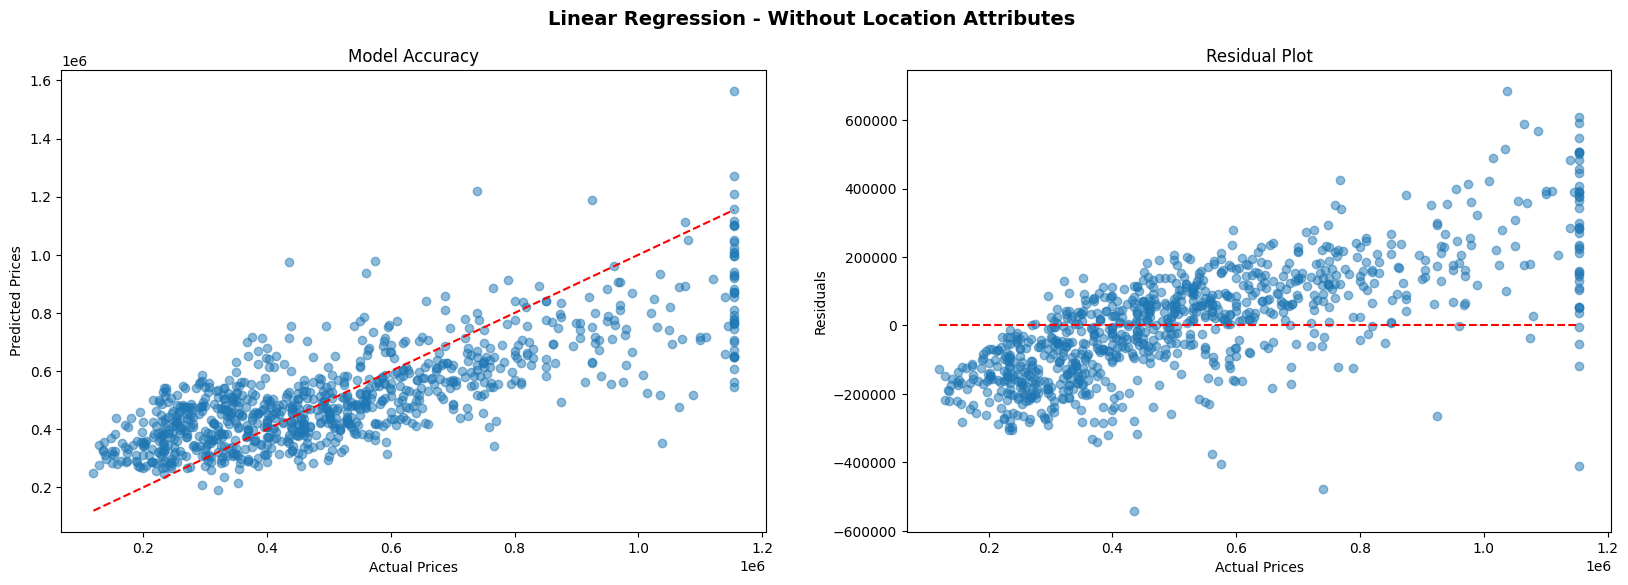

In [399]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Linear Regression - Without Location Attributes', fontsize=14, fontweight='bold')

plt.show()

##**Support Vector Regression (SVR)**

### **SVR** Model for prediction **including** location attributes.

In [400]:
Data_X = df.drop(columns=['price'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)

In [401]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3640, 13), (911, 13), (3640,), (911,))

In [402]:
#Importing the model
from sklearn.svm import SVR

#Fitting the dataset into the model
SVR_Model = SVR(kernel='linear')
SVR_Model.fit(X_train, y_train)

SVR(kernel='linear')

In [403]:
predictions = SVR_Model.predict(X_test)
MSE_SVR_With_Location = metrics.mean_squared_error(y_test, predictions)
R2_SVR_With_Location = r2_score(y_test, predictions)
print('Support Vector Regression (SVR) Model with location Atributes')
print(f'MSE: {MSE_SVR_With_Location:.4f}')
print(f'R2 Score: {R2_SVR_With_Location:.12f}')

Support Vector Regression (SVR) Model with location Atributes
MSE: 29061475483.7761
R2 Score: 0.564039007254


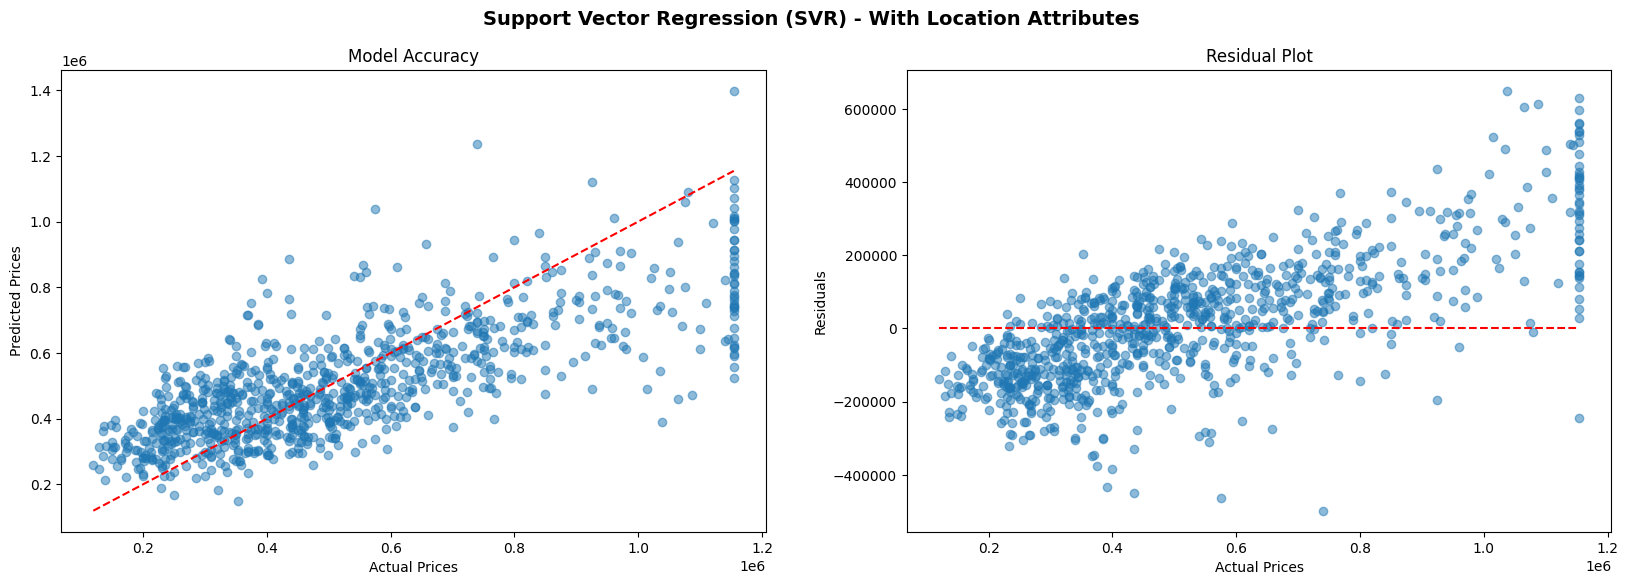

In [404]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Support Vector Regression (SVR) - With Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **SVR** Model for prediction **without including** location attributes.

In [405]:
Data_X_Without_Location = df.drop(columns=['price','city', 'statezip'], axis=1)

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X_Without_Location, Data_Y, test_size=0.2, random_state=92)


In [406]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3640, 11), (911, 11), (3640,), (911,))

In [407]:
#Importing the model
from sklearn.svm import SVR

#Fitting the dataset into the model
SVR_Model = SVR(kernel='linear')
SVR_Model.fit(X_train, y_train)

SVR(kernel='linear')

In [408]:
predictions = SVR_Model.predict(X_test)
MSE_SVR_Without_Location = metrics.mean_squared_error(y_test, predictions)
R2_SVR_Without_Location = r2_score(y_test, predictions)
print('Support Vector Regression (SVR) Model without location Atributes')
print(f'MSE: {MSE_SVR_Without_Location:.4f}')
print(f'R2 Score: {R2_SVR_Without_Location:.12f}')

Support Vector Regression (SVR) Model without location Atributes
MSE: 30788442164.5585
R2 Score: 0.538132197773


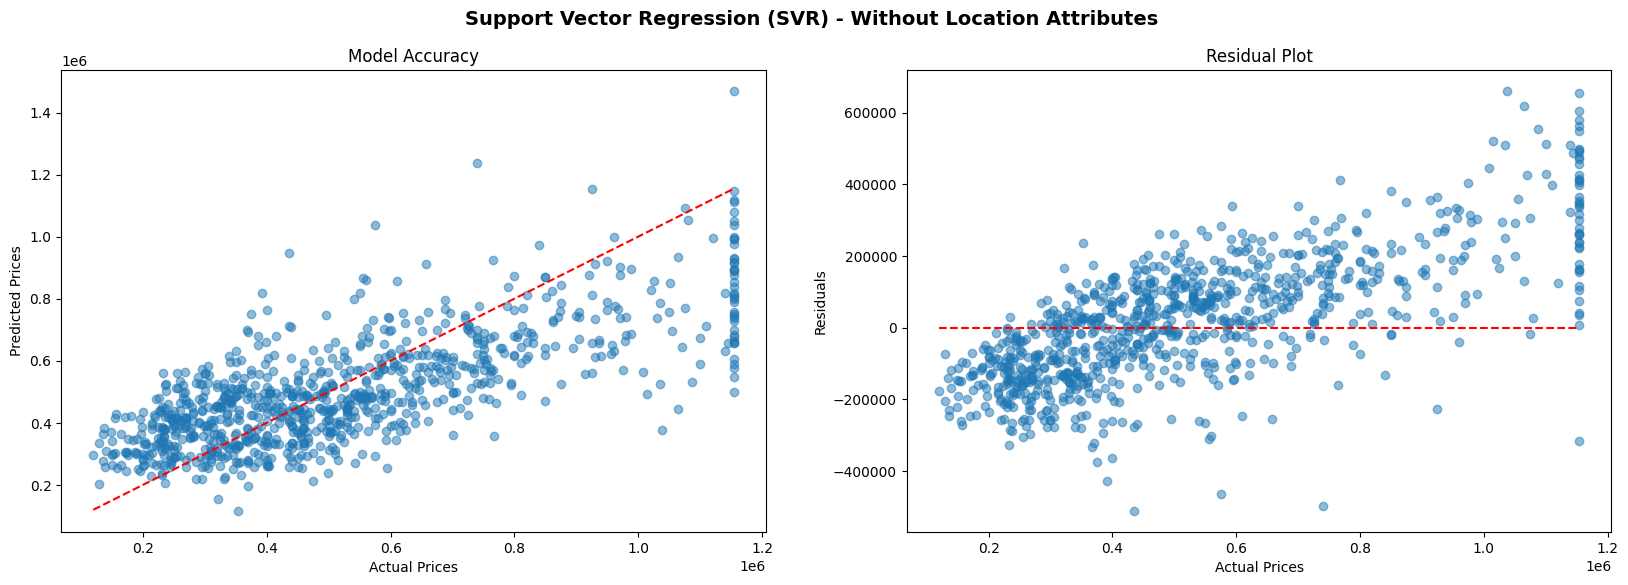

In [409]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Support Vector Regression (SVR) - Without Location Attributes', fontsize=14, fontweight='bold')

plt.show()

##**Decision Tree Regression**

### **Decision Tree** Model for prediction **including** location attributes.

In [410]:
Data_X = df.drop(columns=['price'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)

In [411]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3640, 13), (911, 13), (3640,), (911,))

In [412]:
#Importing the model
from sklearn.tree import DecisionTreeRegressor

#Fitting the dataset into the model
Tree_Model = DecisionTreeRegressor(random_state=220)
Tree_Model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=220)

In [413]:
predictions = Tree_Model.predict(X_test)
MSE_DTree_With_Location = metrics.mean_squared_error(y_test, predictions)
R2_DTree_With_Location = r2_score(y_test, predictions)
print('Decision Tree Regression Model with location Atributes')
print(f'MSE: {MSE_DTree_With_Location:.4f}')
print(f'R2 Score: {R2_DTree_With_Location:.12f}')

Decision Tree Regression Model with location Atributes
MSE: 27714677121.1199
R2 Score: 0.584242783609


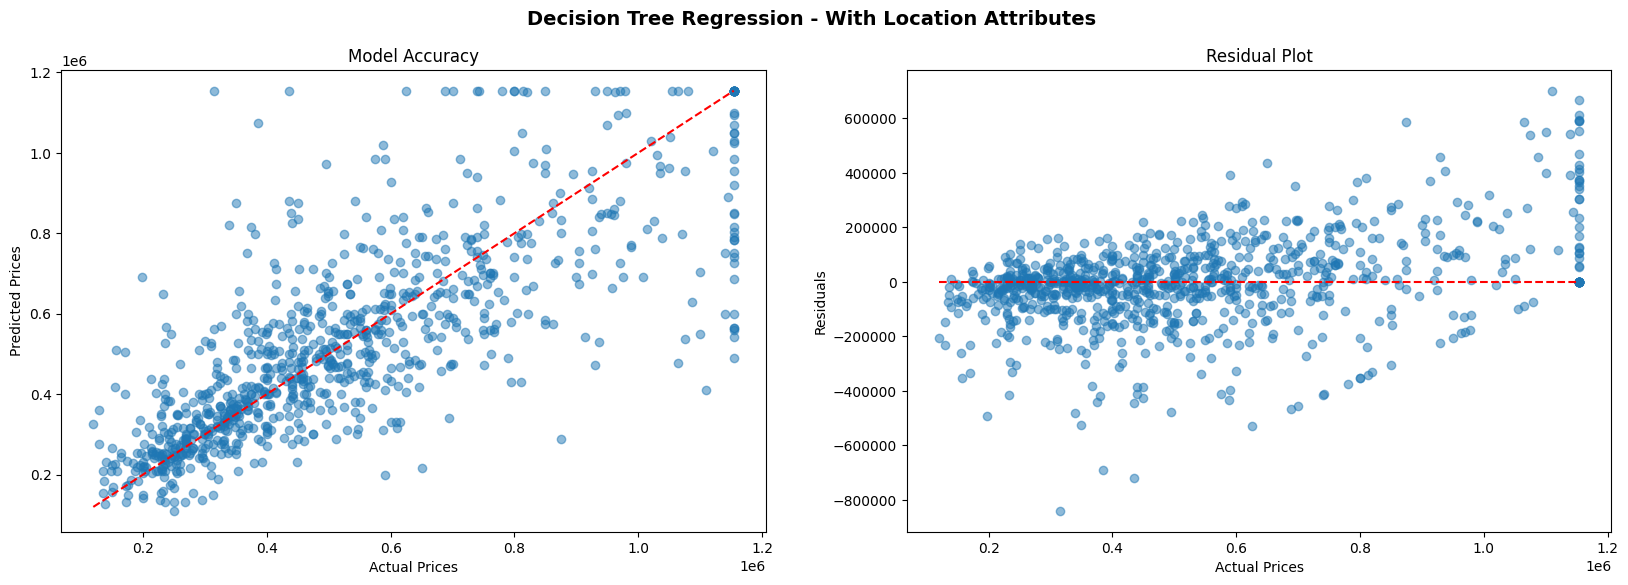

In [414]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Decision Tree Regression - With Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **Decision Tree** Model for prediction **without including** location attributes.

In [415]:
Data_X_Without_Location = df.drop(columns=['price','city', 'statezip'], axis=1)

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X_Without_Location, Data_Y, test_size=0.2, random_state=92)


In [416]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3640, 11), (911, 11), (3640,), (911,))

In [417]:
#Importing the model
from sklearn.tree import DecisionTreeRegressor

#Fitting the dataset into the model
Tree_Model = DecisionTreeRegressor(random_state=220)
Tree_Model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=220)

In [418]:
predictions = Tree_Model.predict(X_test)
MSE_DTree_Without_Location = metrics.mean_squared_error(y_test, predictions)
R2_DTree_Without_Location = r2_score(y_test, predictions)
print('Decision Tree Regression Model without location Atributes')
print(f'MSE: {MSE_DTree_Without_Location:.4f}')
print(f'R2 Score: {R2_DTree_Without_Location:.12f}')

Decision Tree Regression Model without location Atributes
MSE: 49550328196.8460
R2 Score: 0.256678819228


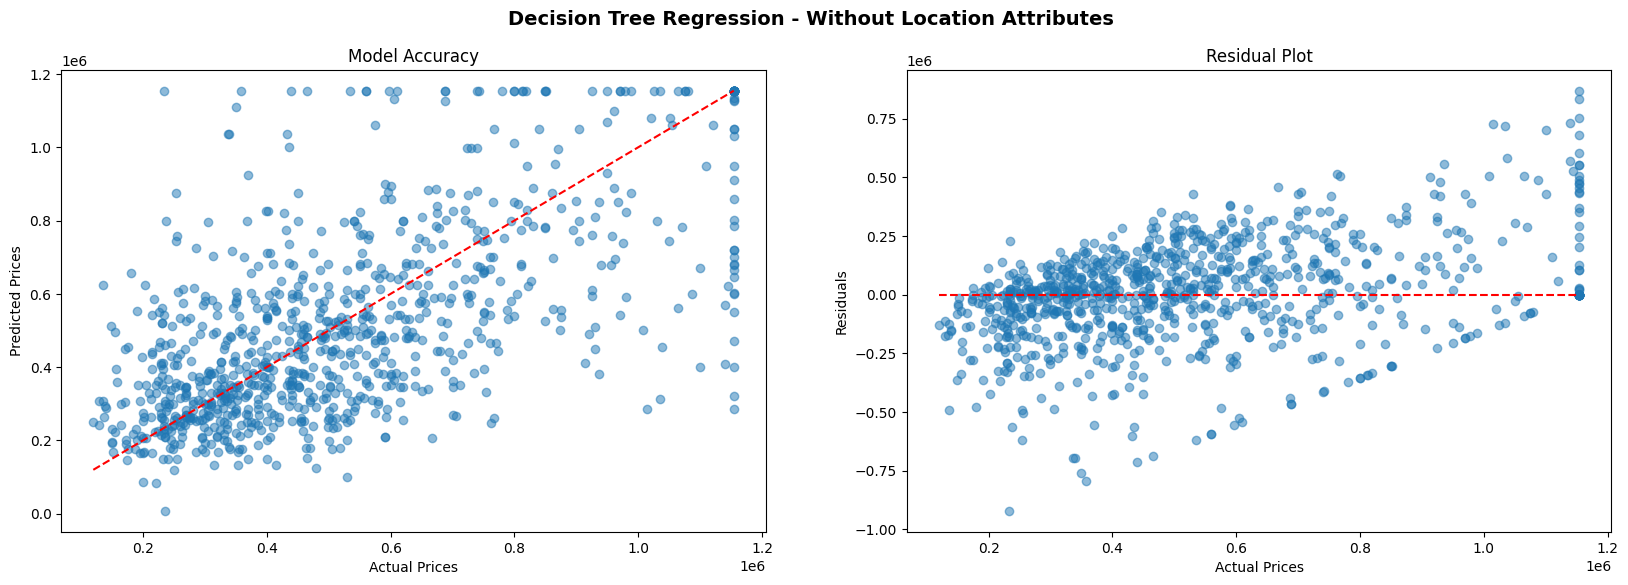

In [419]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Decision Tree Regression - Without Location Attributes', fontsize=14, fontweight='bold')

plt.show()

# **Summary**

Based on the comparison of these metrics, it's clear that the model which includes location attributes performs better in all aspects. It shows lower MSE and a higher R2 Score, indicating that adding location information improves the model's ability to predict house prices accurately.

Therefore, it's safe to say that including location attributes significantly improves the model's predictive capability for house prices.